## 📊 Dataset Description — Bihar Election Candidate-Level Results

Each row in the dataset represents the performance of **one candidate** in a particular **constituency** during the election. The dataset includes the following fields:

### 🗳 Constituency Information
- **Constituency Number**  
  A unique numerical identifier assigned to each constituency.

- **Constituency Name**  
  The official name of the constituency where the candidate contested.

### 👤 Candidate Information
- **Candidate Name**  
  The name of the candidate who contested the election.

- **Party**  
  The political party the candidate belongs to. Independent candidates are marked as *IND* or *Independent*.

### 🧮 Voting Statistics
- **EVM Votes**  
  Number of votes the candidate received through Electronic Voting Machines.

- **Postal Votes**  
  Number of votes received through postal ballots.

- **Total Votes**  
  Total votes received by the candidate  
  *Formula:*  
  `Total Votes = EVM Votes + Postal Votes`

- **Vote Percentage**  
  The percentage of total valid votes in the constituency secured by the candidate.  
  *Formula:*  
  `Vote % = (Total Votes / Total Valid Votes in Constituency) × 100`

---

### ✔️ Summary
This dataset allows detailed analysis of:
- Candidate-level performance  
- Constituency-level vote distribution  
- Party comparison  
- Vote share insights  
- Election trends and patterns  

You can use it for EDA, visualization dashboards, ML modeling, or statistical election analysis.


In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    r2_score, mean_squared_error,
    accuracy_score, classification_report, confusion_matrix
)

plt.style.use('default')

In [2]:
path = 'bihar_election_results.csv'

In [3]:
try:
    df = pd.read_csv(path)
    print(f"Loaded dataset from: {path} (shape: {df.shape})")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at {path}. Please update the path variable.")
except Exception as e:
    raise RuntimeError(f"Error loading dataset: {e}")

Loaded dataset from: bihar_election_results.csv (shape: (2859, 9))


In [4]:
display(df.head())
df.sample(5)

,Constituency Number,Constituency Name,Serial Number,Candidate Name,Party,EVM Votes,Postal Votes,Total Votes,Vote Percentage
0,1,VALMIKI NAGAR,1,DHIRENDRA PRATAP SINGH ALIAS RINKU SINGH,Janata Dal (United),105771,284,106055,45.39
1,1,VALMIKI NAGAR,2,RAMESHWAR YADAV,Bahujan Samaj Party,5294,18,5312,2.27
2,1,VALMIKI NAGAR,3,SURENDRA PRASAD,Indian National Congress,107374,356,107730,46.11
3,1,VALMIKI NAGAR,4,RAJESH SHARMA,Lok Samaj Party,2301,2,2303,0.99
4,1,VALMIKI NAGAR,5,AZHARUDDIN ANSARI,Independent,1553,1,1554,0.67


,Constituency Number,Constituency Name,Serial Number,Candidate Name,Party,EVM Votes,Postal Votes,Total Votes,Vote Percentage
272,28,SITAMARHI,14,NOTA,None of the Above,2279,5,2284,1.05
1768,157,SULTANGANJ,10,AJIT KUMAR,Independent,4278,8,4286,2.04
2401,208,SASARAM,15,KRISHNA KUMAR SINGH,Independent,346,0,346,0.16
410,41,NIRMALI,8,SIYA RAM MANDAL,Independent,2983,9,2992,1.34
1218,111,GORIAKOTHI,11,NOTA,None of the Above,3649,6,3655,1.71


In [5]:
print("---- DataFrame info ----")
df.info()
print("\n---- Missing values (count) ----")
display(df.isna().sum().sort_values(ascending=False).head(50))
print("\n---- Duplicates ----")
print("Duplicate rows:", df.duplicated().sum())

---- DataFrame info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Constituency Number  2859 non-null   int64  
 1   Constituency Name    2859 non-null   object 
 2   Serial Number        2859 non-null   int64  
 3   Candidate Name       2859 non-null   object 
 4   Party                2859 non-null   object 
 5   EVM Votes            2859 non-null   int64  
 6   Postal Votes         2859 non-null   int64  
 7   Total Votes          2859 non-null   int64  
 8   Vote Percentage      2859 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 201.2+ KB

---- Missing values (count) ----


Constituency Number    0
Constituency Name      0
Serial Number          0
Candidate Name         0
Party                  0
EVM Votes              0
Postal Votes           0
Total Votes            0
Vote Percentage        0
dtype: int64


---- Duplicates ----
Duplicate rows: 0


In [6]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Dropped duplicate rows. New shape:", df.shape)

In [7]:
original_cols = df.columns.tolist()
clean_cols = [c.strip().lower().replace(' ', '_').replace('-', '_') for c in original_cols]
df.columns = clean_cols
print("Renamed columns:")
for o, n in zip(original_cols, df.columns):
    if o != n:
        print(f"  {o} -> {n}")

Renamed columns:
  Constituency Number -> constituency_number
  Constituency Name -> constituency_name
  Serial Number -> serial_number
  Candidate Name -> candidate_name
  Party -> party
  EVM Votes -> evm_votes
  Postal Votes -> postal_votes
  Total Votes -> total_votes
  Vote Percentage -> vote_percentage


In [8]:
for col in df.columns:
    if 'date' in col or 'day' in col or 'year' in col:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            print(f"Converted {col} to datetime (non-null count: {df[col].notna().sum()})")
        except Exception:
            pass

C:\Users\gowth\AppData\Local\Temp\ipykernel_4396\2575756940.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Converted candidate_name to datetime (non-null count: 0)


In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print(f"Numeric columns: {len(num_cols)}; categorical columns: {len(cat_cols)}; datetime columns: {len(datetime_cols)}")

Numeric columns: 6; categorical columns: 2; datetime columns: 1


In [10]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
if num_cols:
    df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols)
if cat_cols:
    df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]), columns=cat_cols)

In [11]:
print("\nAfter imputation, missing value counts (top 20):")
display(df.isna().sum().sort_values(ascending=False).head(20))


After imputation, missing value counts (top 20):


candidate_name         2859
constituency_number       0
constituency_name         0
serial_number             0
party                     0
evm_votes                 0
postal_votes              0
total_votes               0
vote_percentage           0
dtype: int64

In [12]:
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip().replace({'nan': np.nan})

In [13]:
for c in df.columns:
    if df[c].dtype == 'object':
        sample = df[c].dropna().head(100).astype(str)
        numeric_like = sample.str.replace(',', '').str.replace('.', '', 1).str.isdigit().mean()
        if numeric_like > 0.6:
            df[c] = pd.to_numeric(df[c].str.replace(',', ''), errors='coerce')
            print(f"Coerced column to numeric: {c}")

In [14]:
print("Final shape after cleaning:", df.shape)

Final shape after cleaning: (2859, 9)


In [15]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
constituency_number,2859.0,NaN,NaN,NaN,127.16929,1.0,68.0,128.0,189.0,243.0,69.288547
constituency_name,2859,241,PIPRA,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serial_number,2859.0,NaN,NaN,NaN,6.804127,1.0,3.0,6.0,10.0,23.0,4.101422
candidate_name,0,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN
party,2859,163,Independent,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
evm_votes,2859.0,NaN,NaN,NaN,17499.197971,90.0,967.5,2270.0,6165.5,140370.0,32948.479007
postal_votes,2859.0,NaN,NaN,NaN,62.093739,0.0,1.0,4.0,37.0,855.0,128.585714
total_votes,2859.0,NaN,NaN,NaN,17561.29171,90.0,968.5,2276.0,6187.5,140608.0,33058.819081
vote_percentage,2859.0,NaN,NaN,NaN,8.499465,0.05,0.47,1.11,3.015,62.66,15.864663


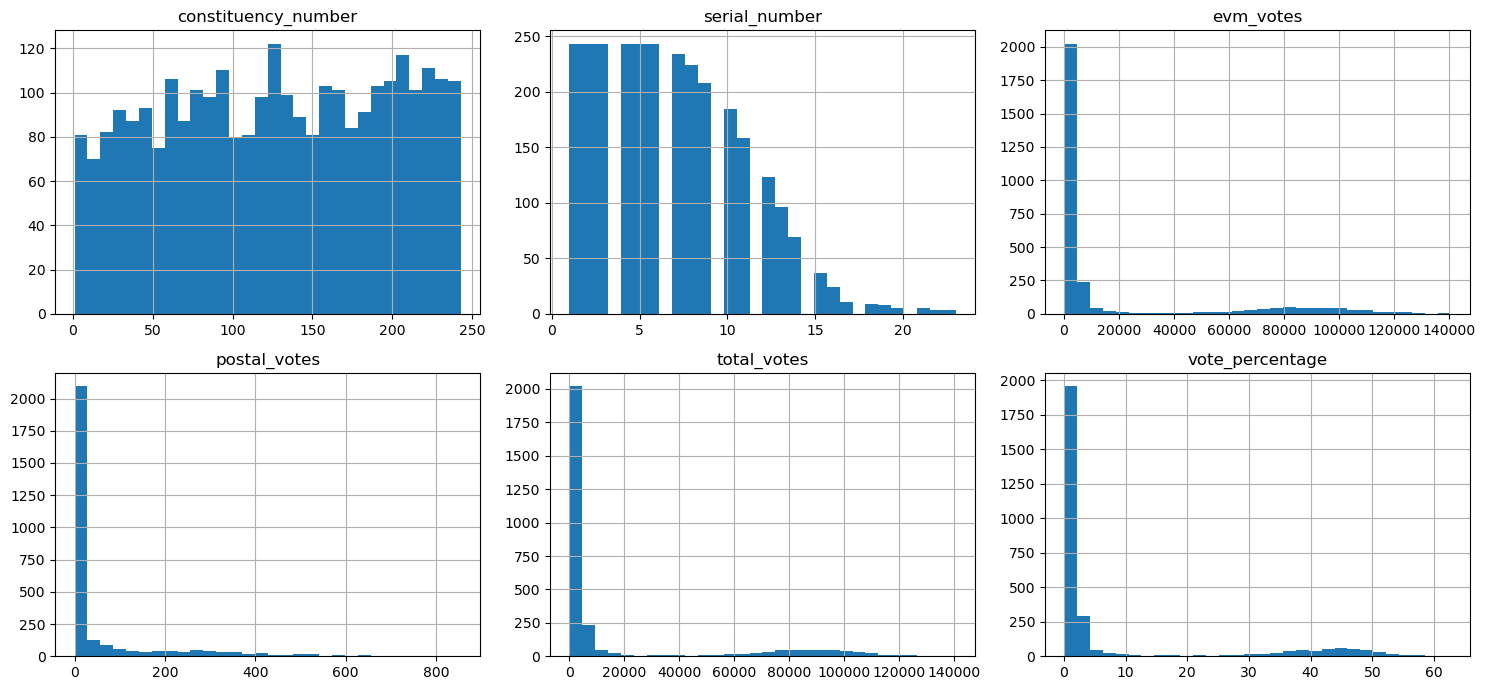

In [16]:
numeric = df.select_dtypes(include=[np.number]).columns.tolist()
if numeric:
    n = len(numeric)
    cols = 3
    rows = (n // cols) + int(n % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3.5))
    axes = axes.flatten()
    for ax, col in zip(axes, numeric):
        df[col].hist(bins=30, ax=ax)
        ax.set_title(col)
    for ax in axes[n:]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

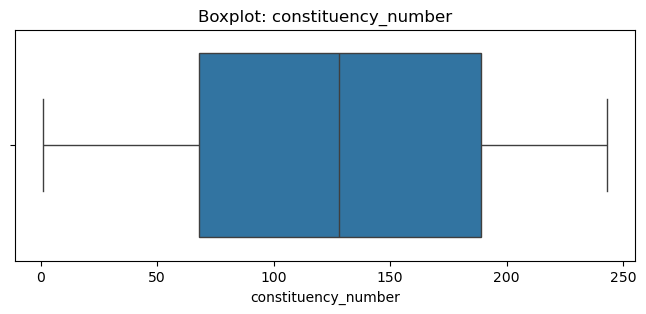

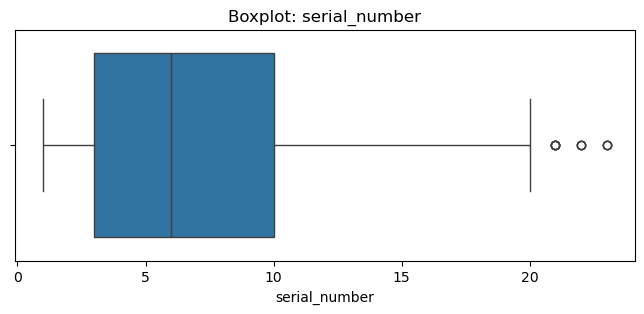

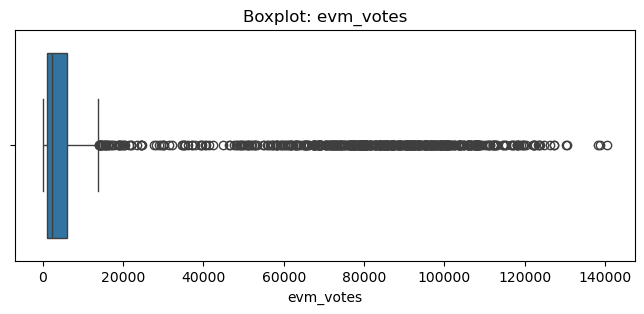

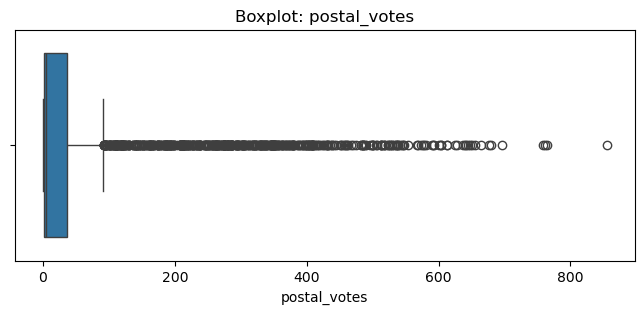

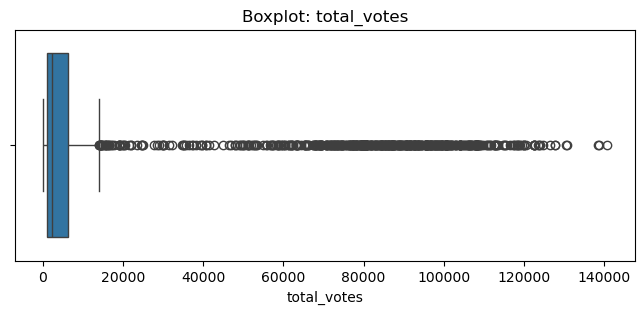

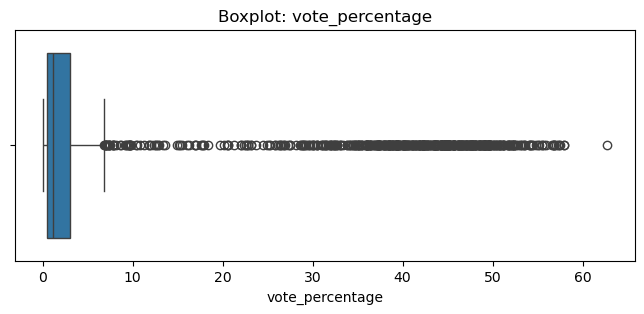

In [17]:
for col in numeric[:6]:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

In [18]:
for col in cat_cols[:6]:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts().head(10))


Value counts for constituency_name:


constituency_name
PIPRA          26
GAYA TOWN      23
CHAINPUR       23
SASARAM        23
KALYANPUR      21
KURHANI        21
MUZAFFARPUR    21
MAHNAR         19
BALRAMPUR      19
OBRA           19
Name: count, dtype: int64


Value counts for party:


party
Independent                     925
None of the Above               243
Jan Suraaj Party                238
Bahujan Samaj Party             181
Rashtriya Janata Dal            143
Bharatiya Janata Party          101
Janata Dal (United)             101
Aam Aadmi Party                  83
Indian National Congress         61
Rashtriya Jansambhavna Party     50
Name: count, dtype: int64

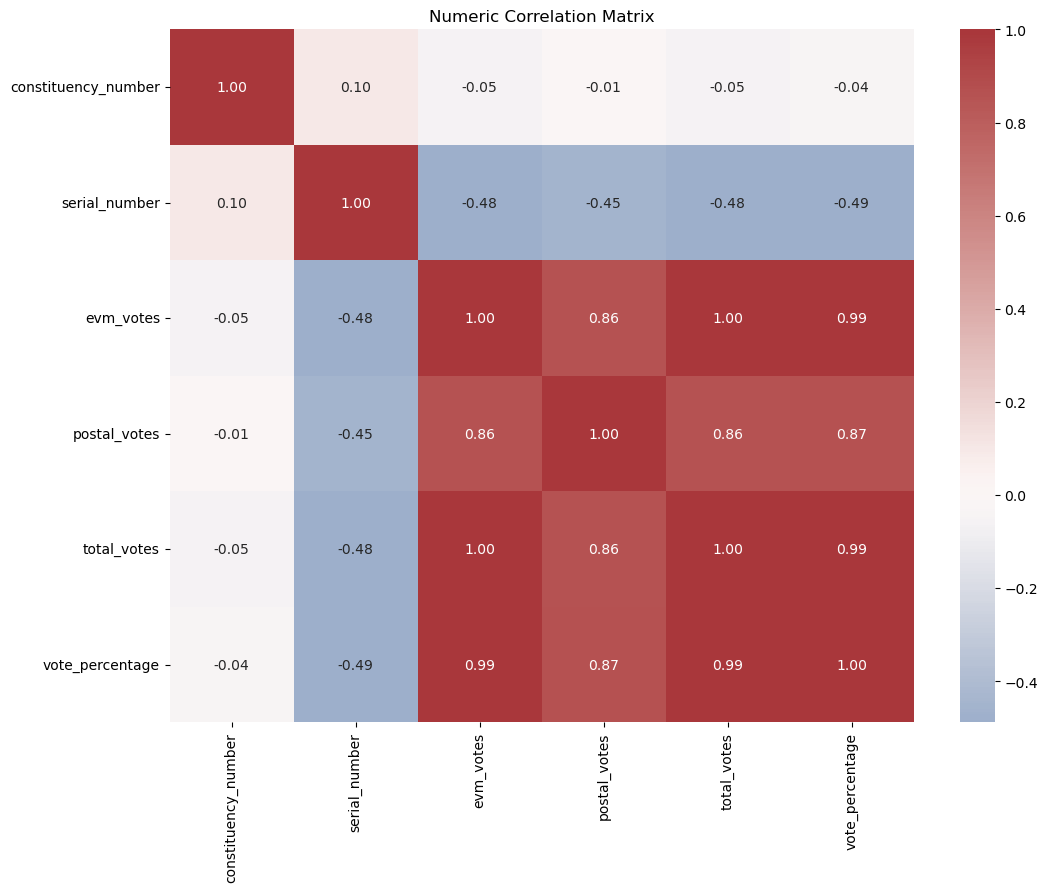

In [19]:
if len(numeric) > 1:
    plt.figure(figsize=(12, 9))
    corr = df[numeric].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
    plt.title("Numeric Correlation Matrix")
    plt.show()

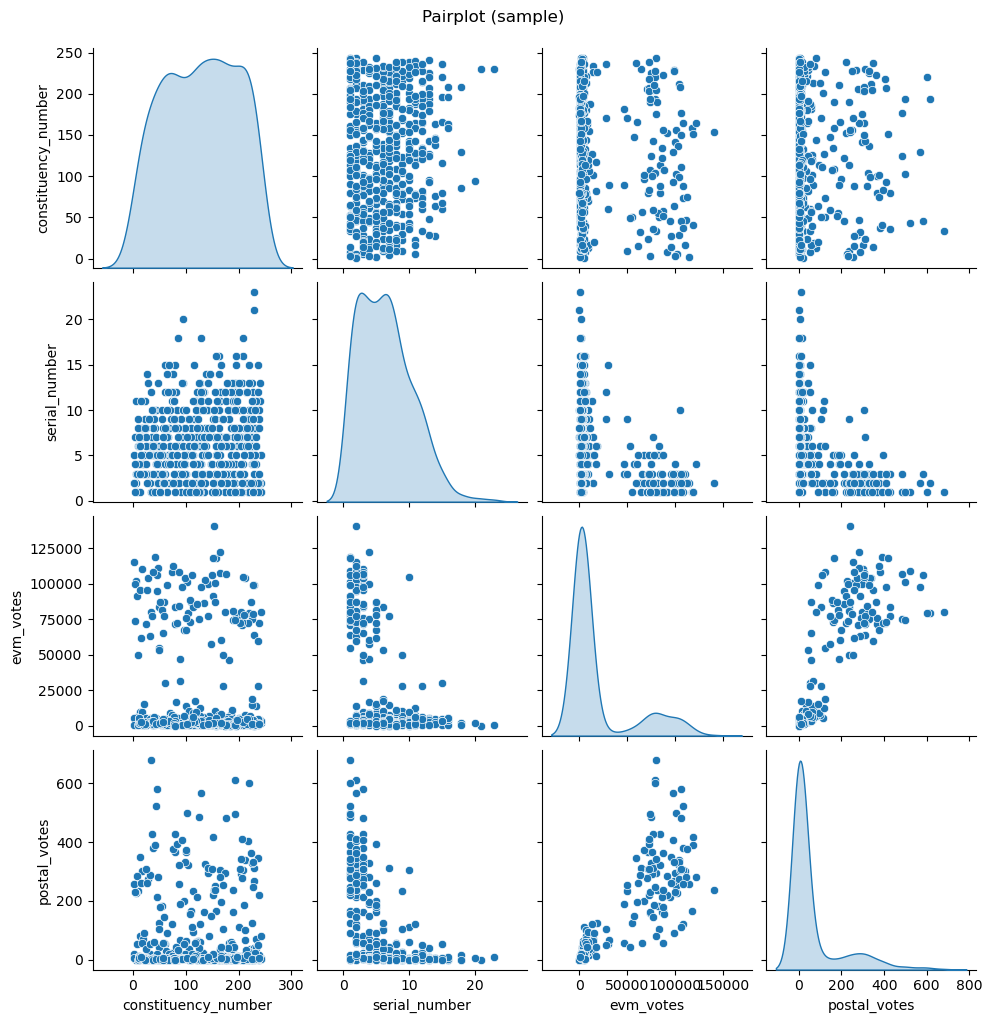

In [20]:
small_num = numeric[:4]
if len(small_num) >= 2:
    sns.pairplot(df[small_num].sample(min(500, len(df))), diag_kind='kde')
    plt.suptitle("Pairplot (sample)", y=1.02)
    plt.show()

In [21]:
possible_targets = [c for c in df.columns if c.lower() in ['target', 'votes', 'vote_share', 'winner', 'result']]
print("Possible target columns found:", possible_targets)
if possible_targets:
    t = possible_targets[0]
    for col in numeric:
        if col == t: continue
        print(f"{t} vs {col} correlation: {df[[t, col]].corr().iloc[0,1]:.3f}")

Possible target columns found: []


In [22]:
feat = df.copy()

In [23]:
if 'votes' in feat.columns and 'valid_votes' in feat.columns and 'votes' != 'valid_votes':
    feat['vote_share'] = feat['votes'] / feat['valid_votes']

In [24]:
LOW_CARDINALITY = 10
to_onehot = [c for c in cat_cols if feat[c].nunique() <= LOW_CARDINALITY]
to_dropin = [c for c in cat_cols if feat[c].nunique() > LOW_CARDINALITY]

print("One-hot encode:", to_onehot)
print("High-cardinality (consider frequency/target encode):", to_dropin)

if to_onehot:
    feat = pd.get_dummies(feat, columns=to_onehot, drop_first=True)

for c in to_dropin:
    freq = feat[c].value_counts(normalize=True)
    feat[f'{c}_freq'] = feat[c].map(freq)

One-hot encode: []
High-cardinality (consider frequency/target encode): ['constituency_name', 'party']


In [25]:
for col in feat.columns:
    if feat[col].isna().any():
        if feat[col].dtype in [np.float64, np.int64]:
            feat[col].fillna(feat[col].median(), inplace=True)
        else:
            feat[col].fillna(feat[col].mode().iloc[0] if not feat[col].mode().empty else 'missing', inplace=True)

print("Feature set shape after engineering:", feat.shape)

Feature set shape after engineering: (2859, 11)


In [26]:
feature_columns = feat.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric features available for modeling:", len(feature_columns))

Numeric features available for modeling: 8


In [27]:
target_candidates = [c for c in feat.columns if c.lower() in ['vote_share', 'votes', 'winner', 'result', 'won']]
target = None
task = None

if target_candidates:
    target = target_candidates[0]
    if np.issubdtype(feat[target].dtype, np.number):
        task = 'regression'
    else:
        task = 'classification'

print("Auto-selected target:", target, "task:", task)

if target is None and 'votes' in feat.columns:
    target = 'votes'
    task = 'regression'

if target is not None:
    X = feat.drop(columns=[target])
    y = feat[target]

    X_num = X.select_dtypes(include=[np.number]).copy()
    print("Using numeric features for modeling:", X_num.shape[1])

    X_num = X_num.loc[:, X_num.nunique() > 1]

    X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)
    print("Train/test shapes:", X_train.shape, X_test.shape)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if task == 'regression':
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        print("Regression results:")
        print("  R2:", r2_score(y_test, preds))
        print("  RMSE:", mean_squared_error(y_test, preds, squared=False))
    else:
        if y_train.dtype == 'object' or not np.issubdtype(y_train.dtype, np.number):
            y_train_enc = pd.factorize(y_train)[0]
            mapping = dict(enumerate(pd.factorize(y_train)[1]))
            y_test_enc = pd.Series(pd.Categorical(y_test, categories=mapping.values())).cat.codes
            model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
            model.fit(X_train_scaled, y_train_enc)
            preds = model.predict(X_test_scaled)
            print("Classification results (encoded labels):")
            print("Accuracy:", accuracy_score(y_test_enc, preds))
            print(classification_report(y_test_enc, preds))
        else:
            model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
            model.fit(X_train_scaled, y_train)
            preds = model.predict(X_test_scaled)
            print("Classification results:")
            print("Accuracy:", accuracy_score(y_test, preds))
            print(classification_report(y_test, preds))

else:
    print("No plausible target column found automatically. Set `target` manually to run ML section.")

Auto-selected target: None task: None
No plausible target column found automatically. Set `target` manually to run ML section.


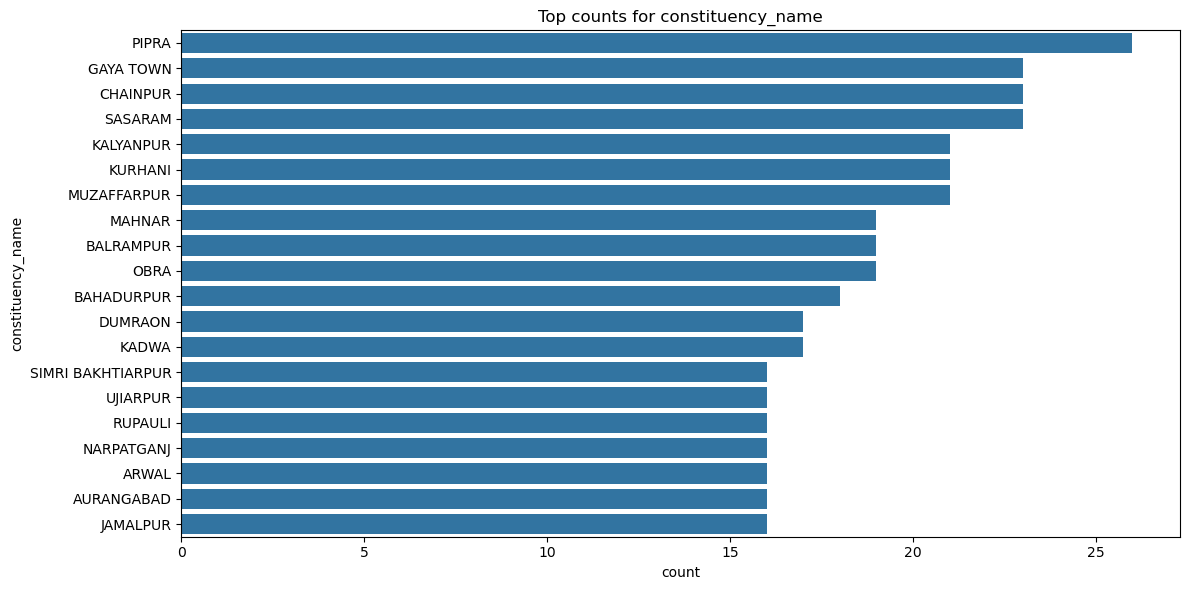

In [28]:
if cat_cols:
    cat_col = cat_cols[0]
    plt.figure(figsize=(12,6))
    order = df[cat_col].value_counts().index[:20]
    sns.countplot(y=cat_col, data=df[df[cat_col].isin(order)], order=order)
    plt.title(f"Top counts for {cat_col}")
    plt.tight_layout()
    plt.show()

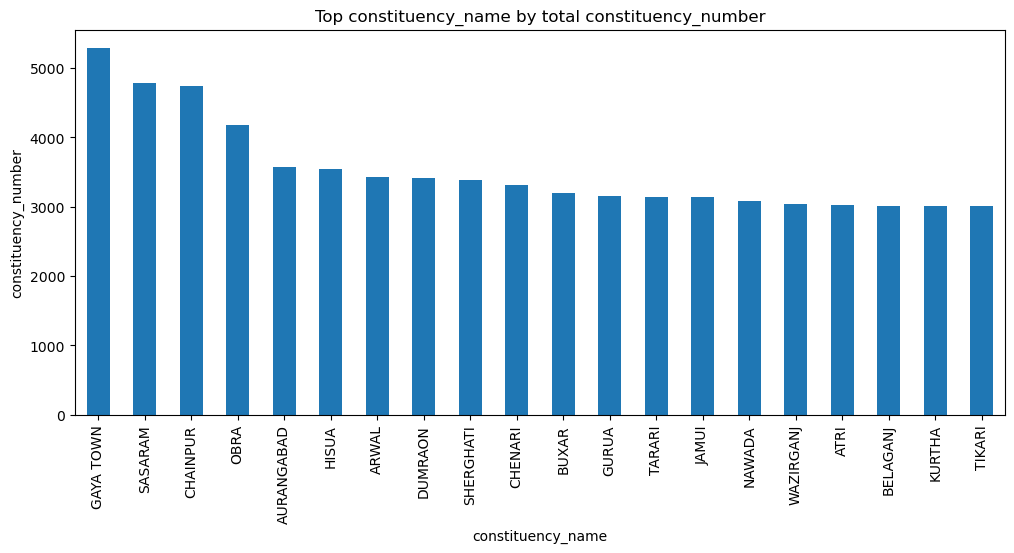

In [29]:
if cat_cols and numeric:
    agg_col = numeric[0]
    group_col = cat_cols[0]
    agg = df.groupby(group_col)[agg_col].sum().sort_values(ascending=False).head(20)
    agg.plot(kind='bar', figsize=(12,5))
    plt.title(f"Top {group_col} by total {agg_col}")
    plt.ylabel(agg_col)
    plt.show()

In [30]:
if datetime_cols and numeric:
    dt = datetime_cols[0]
    ncol = numeric[0]
    ts = df[[dt, ncol]].dropna().set_index(dt).resample('M').sum()
    if not ts.empty:
        plt.figure(figsize=(12,4))
        ts[ncol].plot()
        plt.title(f"Monthly sum of {ncol}")
        plt.show()

In [31]:
output_path = 'cleaned_bihar_election_results.csv'
feat.to_csv(output_path, index=False)
print(f"Exported cleaned dataset to {output_path}")

feat.sample(min(1000, len(feat))).to_csv('cleaned_bihar_election_results.csv', index=False)

Exported cleaned dataset to cleaned_bihar_election_results.csv


In [32]:
def show_missing(df, top=20):
    return df.isna().sum().sort_values(ascending=False).head(top)

def top_correlations(df, n=10):
    numeric = df.select_dtypes(include=[np.number])
    corr = numeric.corr().abs().unstack().sort_values(kind='quicksort', ascending=False)
    corr = corr[corr != 1].drop_duplicates().head(n)
    return corr

print("\nTop missing columns:\n", show_missing(feat, 10))
print("\nTop absolute correlations:\n", top_correlations(feat, 10))


Top missing columns:
 constituency_number       0
constituency_name         0
serial_number             0
candidate_name            0
party                     0
evm_votes                 0
postal_votes              0
total_votes               0
vote_percentage           0
constituency_name_freq    0
dtype: int64

Top absolute correlations:
 evm_votes        total_votes        0.999998
total_votes      vote_percentage    0.992273
vote_percentage  evm_votes          0.992211
postal_votes     vote_percentage    0.867431
total_votes      postal_votes       0.858618
evm_votes        postal_votes       0.857591
serial_number    party_freq         0.595922
vote_percentage  serial_number      0.488603
serial_number    total_votes        0.484665
evm_votes        serial_number      0.484516
dtype: float64
